In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## Descriptive Statistics

### 1. Rata-rata umur pengguna

In [6]:
np.mean(df.age)

39.20702541106129

### 2. Rata-rata nilai BMI dari pengguna yang merokok

In [7]:
np.mean(df[df['smoker'] == "yes"].bmi)

30.708448905109503

### 3. Apakah variansi dari data charges perokok dan non perokok sama?

In [8]:
var_charges_S = np.var(df[df['smoker'] == "yes"].charges)
var_charges_NS = np.var(df[df['smoker'] == "no"].charges)

print(f'Variance Charges Smoker = {var_charges_S:.2f}')
print(f'Variance Charges Non Smoker = {var_charges_NS:.2f}')

Variance Charges Smoker = 132721153.14
Variance Charges Non Smoker = 35891656.00


### 4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [9]:
mean_smoker_male = np.mean(df[df['sex'] == 'male'].age)
mean_smoker_female = np.mean(df[df['sex'] == 'female'].age)

print(f'Rata-rata umur perokok laki-laki = {mean_smoker_male:.2f}')
print(f'Rata-rata umur perokok perempuan = {mean_smoker_female:.2f}')

Rata-rata umur perokok laki-laki = 38.92
Rata-rata umur perokok perempuan = 39.50


### 5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [10]:
charges_smoker = np.mean(df[df['smoker'] == 'yes'].charges)
charges_non_smoker = np.mean(df[df['smoker'] == 'no'].charges)

print(f'Rata-rata tagihan kesehatan perokok = {charges_smoker:.2f}')
print(f'Rata-rata tagihan kesehatan non perokok = {charges_non_smoker:.2f}')

Rata-rata tagihan kesehatan perokok = 32050.23
Rata-rata tagihan kesehatan non perokok = 8434.27


###  6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25?

In [11]:
smoker_BMI25 = np.mean(df.loc[(df['bmi'] > 25) & (df['smoker'] == 'yes')].charges)
non_smoker_BMI25 = np.mean(df.loc[(df['bmi'] > 25) & (df['smoker'] == 'no')].charges)

print(f'Tagihan perokok BMI > 25 = {smoker_BMI25:.2f}')
print(f'Tagihan non perokok BMI > 25 = {non_smoker_BMI25:.2f}')

Tagihan perokok BMI > 25 = 35116.91
Tagihan non perokok BMI > 25 = 8629.59


## Analisa Variabel Kategorik (PMF)

### 1. Gender mana yang memiliki tagihan paling tinggi?

In [12]:
pd.DataFrame(df.groupby(['sex']).max().charges)

,charges
sex,
female,63770.43
male,62592.87


### 2. Distribusi peluang tagihan di tiap-tiap region

In [13]:
sum_charges = np.sum(df.charges)
pd.DataFrame(df.groupby(['region']).sum().charges.apply(lambda x: x/sum_charges))

,charges
region,
northeast,0.24
northwest,0.23
southeast,0.30
southwest,0.23


### 3. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [14]:
pd.DataFrame(df.groupby(['region']).count().age).rename(columns={'age':'people'})

,people
region,
northeast,324
northwest,325
southeast,364
southwest,325


### 4. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [15]:
pd.DataFrame(df.groupby(['smoker']).count().age).rename(columns={'age':'people'})

,people
smoker,
no,1064
yes,274


### 5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [16]:
count_smokers = df.groupby(['smoker']).count().age[1]
female_smokers = df.loc[(df.smoker == 'yes')].groupby(['sex']).count().age[0]

print(f'Peluang seseorang perempuan jika diketahui dia merokok = {female_smokers/count_smokers:.3f}')

Peluang seseorang perempuan jika diketahui dia merokok = 0.420


### 6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [17]:
count_smokers = df.groupby(['smoker']).count().age[1]
male_smokers = df.loc[(df.smoker == 'yes')].groupby(['sex']).count().age[1]

print(f'Peluang seseorang laki-laki jika diketahui dia merokok = {male_smokers/count_smokers:.3f}')

Peluang seseorang laki-laki jika diketahui dia merokok = 0.580


## Analisa Variabel Kontinu (CDF)

In [18]:
def cari_cdf(x,col='charges', type='besar'):
    BMI25 = df[condition]
    series = BMI25[col]
    mean = np.mean(series)
    var = np.var(series)
    std = np.sqrt(var)
    X = (x-mean)/std
    
    if type == 'besar':
        ans = 1-norm.cdf(X,0,1)
    else:
        ans = norm.cdf(X,0,1)
    return print(f'Peluang = {ans}'), sns.distplot(BMI25[col]), plt.axvline(x, color="r", linestyle="--")

### 1. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700

Peluang = 0.9577125487589742


(None,
 <AxesSubplot:xlabel='charges', ylabel='Density'>,
 <matplotlib.lines.Line2D at 0x1a4c06fad90>)

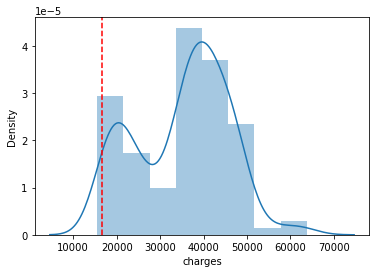

In [19]:
condition = (df.bmi > 25) & (df.smoker == 'yes')
cari_cdf(16700)

### 2. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok?

Peluang = 0.9086407687093684


(None,
 <AxesSubplot:xlabel='charges', ylabel='Density'>,
 <matplotlib.lines.Line2D at 0x1a4c4814280>)

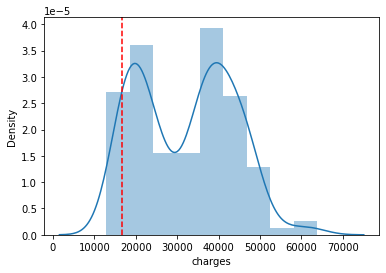

In [20]:
condition = (df.smoker == 'yes')
cari_cdf(16700)

### 3. Mana yang lebih mungkin terjadi? 

#### a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

Peluang = 0.4150257865243673


(None,
 <AxesSubplot:xlabel='charges', ylabel='Density'>,
 <matplotlib.lines.Line2D at 0x1a4c489f130>)

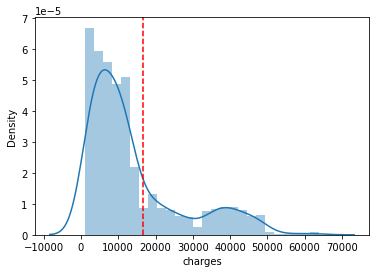

In [21]:
condition = (df.bmi > 25)
cari_cdf(16700)

#### b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

Peluang = 0.1962425286399061


(None,
 <AxesSubplot:xlabel='charges', ylabel='Density'>,
 <matplotlib.lines.Line2D at 0x1a4c4956190>)

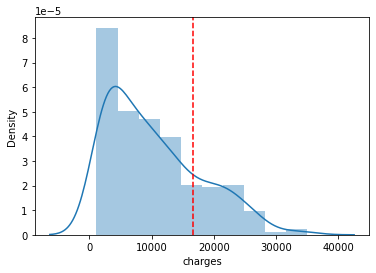

In [22]:
condition = (df.bmi < 25)
cari_cdf(16700)

### 4. Mana yang lebih mungkin terjadi?

#### a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

Peluang = 0.9577125487589742


(None,
 <AxesSubplot:xlabel='charges', ylabel='Density'>,
 <matplotlib.lines.Line2D at 0x1a4c49d1490>)

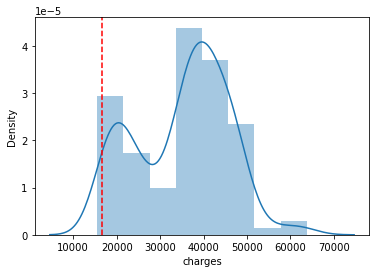

In [23]:
condition = (df.smoker == 'yes') & (df.bmi > 25)
cari_cdf(16700)

#### b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

Peluang = 0.09064317172700154


(None,
 <AxesSubplot:xlabel='charges', ylabel='Density'>,
 <matplotlib.lines.Line2D at 0x1a4c4a3b550>)

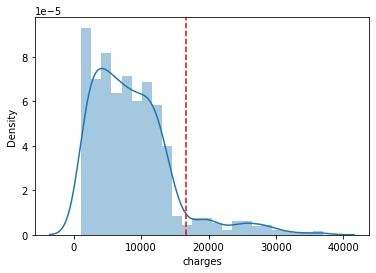

In [24]:
condition = (df.smoker == 'no') & (df.bmi > 25)
cari_cdf(16700)

## Analisa Korelasi Variabel

In [25]:
df['smoker2'] = df.smoker.map({'yes':1, 'no':0})

Text(0.5, 1.0, 'Smoker vs Charges')

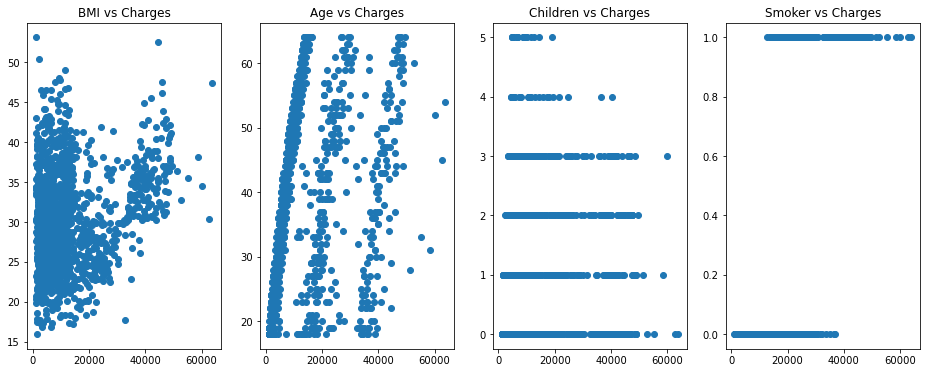

In [26]:
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
plt.scatter(df.charges, df.bmi )
plt.title("BMI vs Charges")

plt.subplot(1,4,2)
plt.scatter(df.charges, df.age)
plt.title("Age vs Charges")


plt.subplot(1,4,3)
plt.scatter(df.charges, df.children)
plt.title("Children vs Charges")

plt.subplot(1,4,4)
plt.scatter(df.charges, df.smoker2)
plt.title("Smoker vs Charges")


<AxesSubplot:>

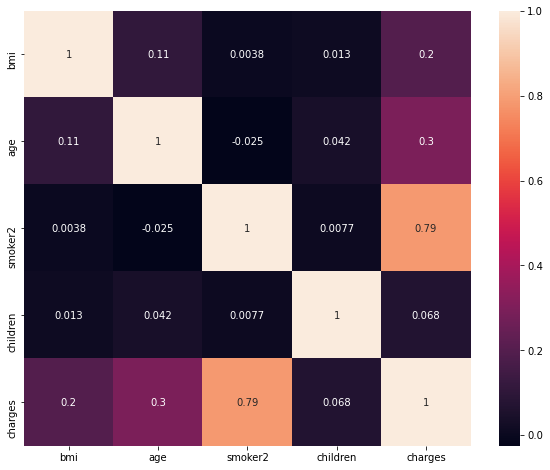

In [49]:
plt.figure(figsize=(10,8))
corr = df[['bmi', 'age', 'smoker2','children', 'charges']].corr()
sns.heatmap(corr, annot=True)

## Test Hipotesis

### 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

Hipotesis
- H0: Tagihan perokok = non perokok
- H1: Tagihan perokok < non perokok

In [28]:
alpha = 0.05

In [29]:
#setup data untuk masing-masing kategori
cond1 = (df.smoker == "yes")
cond2 = (df.smoker == "no")

tagihan_perokok = df[cond1].charges
tagihan_non_perokok = df[cond2].charges
tagihan_non_perokok_sample = tagihan_non_perokok.sample(n=274, random_state=17)

In [30]:
#check sampling
print(tagihan_non_perokok.mean())
print(tagihan_non_perokok_sample.mean())

8434.268297856199
8263.435098759126


In [31]:
#check variance
np.var(tagihan_perokok), np.var(tagihan_non_perokok_sample)

(132721153.13625304, 33328888.188136943)

In [32]:
#critical value
t_crit = t.ppf(alpha,df=273)
print(t_crit)

-1.650454303021593


In [33]:
#statistical test
stat, p = ttest_ind(tagihan_perokok, tagihan_non_perokok_sample, equal_var=False, alternative='less')

print('p-value = %.8f' % (p))

p-value = 1.00000000


In [34]:
#hasil berdasarkan P-value
if p > alpha:
    print('H0 diterima') 
else:
    print('H0 ditolak')

H0 diterima


##### _Dengan tingkat kepercayaan 95% terdapat bukti cukup untuk mengatakan bahwa tagihan perokok secara rata-rata lebih besar daripada tagihan non perokok._ 

### 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

Hipotesis:
- H0: Tagihan BMI besar = Tagihan BMI kecil
- H1: Tagihan BMI besar < Tagihan BMI kecil

In [35]:
cond1 = (df.bmi > 25)
cond2 = (df.bmi <= 25)

bmi_besar = df[cond1].charges
bmi_kecil = df[cond2].charges

len(bmi_besar), len(bmi_kecil)

(1091, 247)

In [36]:
#sampling & checking
bmi_besar_sample = bmi_besar.sample(n=247, random_state=1)

bmi_besar.mean(), bmi_besar_sample.mean()

(13946.47603532447, 14218.25426417004)

In [38]:
#check variance
np.var(bmi_kecil), np.var(bmi_besar_sample)

(55940041.24428085, 167496860.75306293)

In [39]:
#critical value
t_crit = t.ppf(alpha,df=246)
print(t_crit)

-1.6510713448508139


In [40]:
#statistical test
stat, p = ttest_ind(bmi_besar_sample, bmi_kecil, equal_var=False, alternative='less')

print('p-value = %.8f' % (p))

p-value = 0.99997764


In [41]:
#hasil berdasarkan P-value
if p > alpha:
    print('H0 diterima') 
else:
    print('H0 ditolak')

H0 diterima


##### _Dengan tingkat kepercayaan 95% terdapat bukti cukup untuk mengatakan bahwa tagihan pengguna dengan BMI diatas 25 lebih BESAR daripada tagihan pengguna dengan BMI dibawah 25._ 

### 3. BMI laki-laki dan perempuan sama

Hipotesis:
- H0: BMI laki-laki = BMI perempuan
- H1: BMI laki-laki ≠ BMI perempuan  

In [42]:
cond1 = (df.sex == 'male')
cond2 = (df.sex == 'female')

bmi_male = df[cond1].bmi
bmi_female = df[cond2].bmi

In [43]:
len(bmi_male), len(bmi_female)

(676, 662)

In [44]:
#sampling dan checking
bmi_male_sample = bmi_male.sample(n=662, random_state=17)

bmi_male.mean(), bmi_male_sample.mean()

(30.943128698224832, 30.964879154078528)

In [45]:
#check variance
np.var(bmi_male_sample), np.var(bmi_female)

(37.914850211982355, 36.49917703379856)

In [46]:
#critical value
t_crit = t.ppf(alpha,df=661)
print(t_crit)

-1.6471621291696426


In [47]:
#statistical test
stat, p = ttest_ind(bmi_male_sample, bmi_female, equal_var=False, alternative='two-sided')

print('p-value = %.8f' % (p))

p-value = 0.08037162


In [48]:
#hasil berdasarkan P-value
if p > alpha:
    print('H0 diterima') 
else:
    print('H0 ditolak')

H0 diterima


##### _Dengan tingkat kepercayaan 95% terdapat bukti cukup untuk mengatakan bahwa tagihan pengguna dengan BMI diatas 25 lebih BESAR daripada tagihan pengguna dengan BMI dibawah 25._ 